# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.4/201.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 138MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 262MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 240MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 253MB/s]

100%|██████████| 170M/170M [00:01<00:00, 132MB/s]



# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-13-gb412696 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 40.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


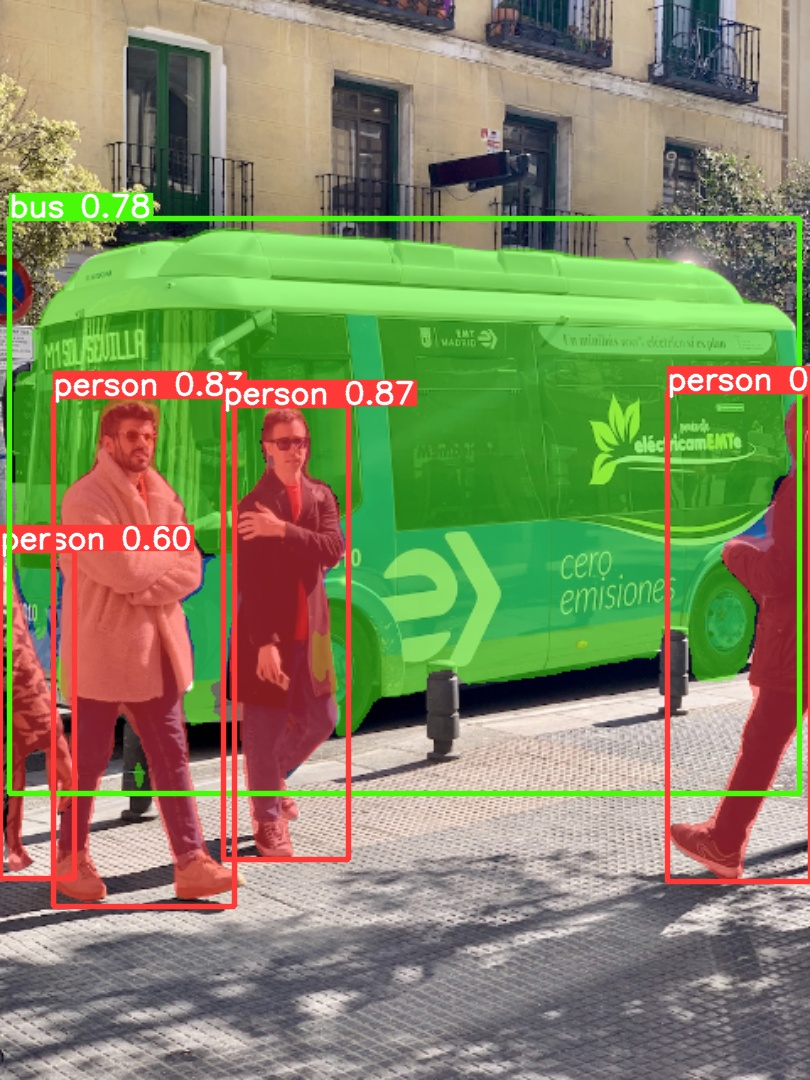

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

# 2. Infer on COCO image

In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/EbOBS5l.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-13-gb412696 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 14.6ms
Speed: 0.5ms pre-process, 14.6ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


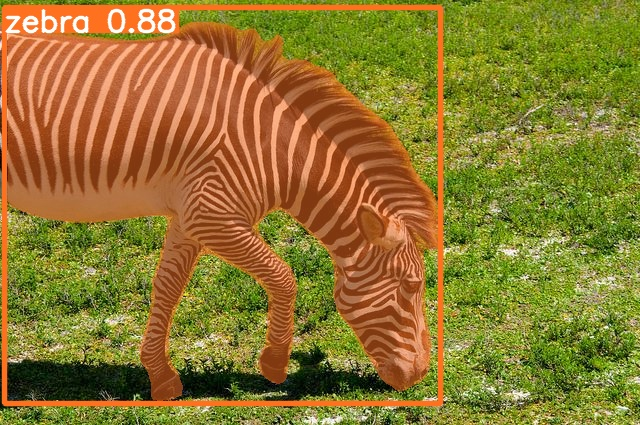

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

  0%|          | 0.00/6.79M [00:00<?, ?B/s]

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-13-gb412696 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.9M/14.9M [00:00<00:00, 25.9MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 90.8MB/s]
Dataset download success ✅ (0.5s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 895.48it/s]
val: New cache created: /content/datasets/coco128-s

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bUzhy1RsrRJGwJZFO2Ko")
project = rf.workspace("tea-leaf-6xogn").project("main-dataset-ik1ey")
version = project.version(1)
dataset = version.download("yolov5")

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to main-dataset-1 in yolov5pytorch:: 100%|██████████| 2632/2632 [00:00<00:00, 7618.09it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- anthracnose
- brown-blight
- clean
- gray-blight
- white-spot
nc: 5
roboflow:
  license: CC BY 4.0
  project: main-dataset-ik1ey
  url: https://universe.roboflow.com/tea-leaf-6xogn/main-dataset-ik1ey/dataset/1
  version: 1
  workspace: tea-leaf-6xogn
test: ../test/images
train: main-dataset-1/train/images
val: main-dataset-1/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 120 --data {dataset.location}/data.yaml --weights yolov7-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

/content/yolov5
2024-03-12 20:36:00.387278: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 20:36:00.387340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 20:36:00.388792: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/main-dataset-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=120, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/train-seg/custom-dataset/results.png'

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/main-dataset-1/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Traceback (most recent call last):
  File "/content/yolov5/segment/val.py", line 518, in <module>
    main(opt)
  File "/content/yolov5/segment/val.py", line 489, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/segment/val.py", line 207, in run
    model = DetectMultiBackend(weights, device=device, dn

### Infer With Your Custom Model

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset2/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/main-dataset-1/test/images/IMG-20230226-WA0009_jpg.rf.987b63918f22c761412576485f0a3023.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Traceback (most recent call last):
  File "/content/yolov5/segment/predict.py", line 306, in <module>
    main(opt)
  File "/content/yolov5/segment/predict.py", line 301, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packa

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/predict-seg/custom-dataset2/IMG-20230226-WA0009_jpg.rf.987b63918f22c761412576485f0a3023.jpg'

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.imgur.com/rFsDnHC.jpg",
    "https://i.imgur.com/aEcceXm.jpg",
    "https://i.imgur.com/s4N63fx.jpg",
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v6.2-149-g77dcf55 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/3 /content/example_images/example_0.jpg: 320x320 1 L, 1 Y, 8.2ms
image 2/3 /content/example_images/example_1.jpg: 320x320 1 G, 1 I, 8.7ms
image 3/3 /content/example_images/example_2.jpg: 320x320 1 H, 6.9ms
Speed: 0.3ms pre-process, 8.0ms inference, 1.0ms NMS per image at shape (1, 3, 320, 32

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp3/labels")):
  with open(os.path.join("runs/predict-seg/exp3/labels",txt_file), 'r') as fid:
    for line in fid:
      label, x1, y1, x2, y2, conf = line.split(" ")
      conf = float(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break

Image has a low confidence prediction, uploading to project: example_0.jpg
Image has a low confidence prediction, uploading to project: example_1.jpg
Image has a low confidence prediction, uploading to project: example_2.jpg
